In [2]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree

import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import pprint

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc, mean_squared_error
import matplotlib.pyplot as plt


%matplotlib inline


In [3]:
# Reading in emissions data
df = pd.read_csv('processed.csv')

In [4]:
# Set Pandas to display more columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

# Display the first few rows of the DataFrame
print(df.head())

# Display data types of each column
print(df.dtypes)

          Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3                 Oats              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
0                                                NaN          
1                                                NaN          
2                                                NaN       

# Dropping units and making numeric

In [5]:
import pandas as pd

# Read the data
data = pd.read_csv("processed.csv")

# Function to remove units and convert to numeric
def preprocess_column(column):
    if data[column].dtype == object and column not in ["Food product", "Matched_food_product"]:
        # Remove non-numeric characters and convert to float
        return pd.to_numeric(data[column].str.replace('[^\d.]', '', regex=True), errors='coerce')
    else:
        # Return the column as-is if it's already numeric or if it's 'Food product' or 'Matched_food_product'
        return data[column]

# Apply preprocessing to each column except 'Food product' and 'Matched_food_product'
for column in data.columns:
    data[column] = preprocess_column(column)

# Handling missing values (replacing NaNs with 0.0)
data.fillna(0.0, inplace=True)

# The data is now preprocessed


In [6]:
# Set Pandas to display more columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Display the first few rows of the DataFrame
print(data.head())

# Display data types of each column
print(data.dtypes)

          Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3                 Oats              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
0                                           0.000000          
1                                           0.000000          
2                                           0.000000       

In [7]:
data.to_csv('processed_no_units.csv', index=False)

# Changing to grams

In [8]:
data = pd.read_csv("processed_no_units.csv")

# Convert 'per kg' columns to 'per g' by dividing by 1000
columns_per_kg = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 
                  'Transport', 'Packging', 'Retail', 'Total_emissions', 
                 ]
for col in columns_per_kg:
    data[col] = data[col] / 1000

# Convert 'per 100g' columns to 'per g' by dividing by 100
columns_per_100g = ['calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 
                    'choline', 'folate', 'folic_acid', 'niacin', 
                    'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a',
                    'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 
                    'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 
                    'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 
                    'vitamin_e', 'tocopherol_alpha', 'vitamin_k', 'calcium', 
                    'copper', 'irom', 'magnesium', 'manganese', 'phosphorous', 
                    'potassium', 'selenium', 'zink', 'protein', 'alanine', 
                    'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 
                    'glycine', 'histidine', 'hydroxyproline', 'isoleucine', 
                    'leucine', 'lysine', 'methionine', 'phenylalanine', 
                    'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 
                    'valine', 'carbohydrate', 'fiber', 'sugars', 'fructose', 
                    'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 
                    'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids',
                    'polyunsaturated_fatty_acids', 'fatty_acids_total_trans', 
                    'alcohol', 'ash', 'caffeine', 'theobromine', 'water',
                   ]
for col in columns_per_100g:
    data[col] = data[col] / 100

In [9]:
data.to_csv('processed_no_units_gram.csv', index=False)

# Some EDA 

In [10]:
data = pd.read_csv("processed_no_units.csv")

# Define the key nutrients (You may need to adjust this list based on your dataset)
nutrients = ['protein', 'fiber', 'calcium', 'irom', 'magnesium', 'potassium', 'vitamin_c']

# Calculate nutrient density scores
# Note: Ensure that 'calories' is already in the correct unit (per g) in your dataset
data['nutrient_density'] = data[nutrients].sum(axis=1) / data['calories']

# Rank foods based on nutrient density
ranked_foods = data.sort_values(by='nutrient_density', ascending=False)

# Display top 10 most nutrient-dense foods
print(ranked_foods[['Food product', 'nutrient_density']].head(10))


      Food product  nutrient_density
31          Coffee         28.160000
20        Tomatoes         15.220625
23         Cabbage         10.753333
30           Melon          9.607353
22         Turnips          9.142857
5         Potatoes          8.374310
27          Apples          7.198800
13         Soymilk          6.480976
38            Milk          5.951639
21  Onions & Leeks          5.317931


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("final_df.csv")


In [11]:
data.columns

Index(['food', 'emissions', 'price', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'satura

In [18]:
#Adjust so all plots are the same
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'lavender'
plt.rcParams['savefig.facecolor']= 'lavender'
plt.rcParams['axes.facecolor'] = 'white' #'oldlace'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rc('axes',edgecolor='black')

In [56]:
data = data.drop(index=30)

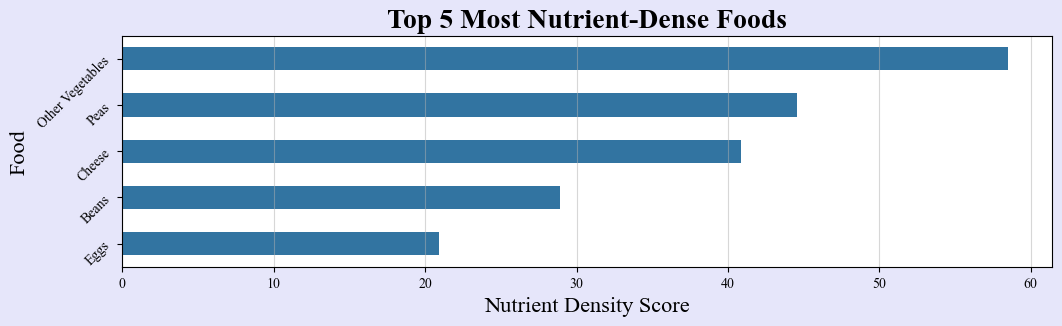

In [57]:

# Calculate nutrient density (as before)
nutrients = [
    'protein', 'fiber', 'calcium', 'irom', 'magnesium', 'potassium', 'vitamin_c',
    'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
    'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
    'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
    'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
    'vitamin_b6', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
    'vitamin_k', 'copper', 'manganese', 'phosphorous', 'selenium', 'zink', 
    'alanine', 'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
    'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
    'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
    'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'sugars',
    'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
    'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids',
    'polyunsaturated_fatty_acids', 'fatty_acids_total_trans', 'alcohol',
    'ash', 'caffeine', 'theobromine', 'water'
]

data['nutrient_density'] = data[nutrients].sum(axis=1)
# Sort and select top 10 foods
top_foods = data.sort_values(by='nutrient_density', ascending=False).head(5)

# Plot
plt.figure(figsize=(12, 3))
sns.barplot(x='nutrient_density', y='food', data=top_foods, width=0.5)
plt.title('Top 5 Most Nutrient-Dense Foods', fontsize=20, fontweight='bold')
plt.xlabel('Nutrient Density Score', fontsize = 16)
plt.ylabel('Food', fontsize= 16)
plt.yticks(rotation=45, fontsize=10)
plt.grid(axis='x', alpha =0.5)
plt.savefig('nutrient_density.png', dpi=300, bbox_inches='tight', format='png')
plt.show()


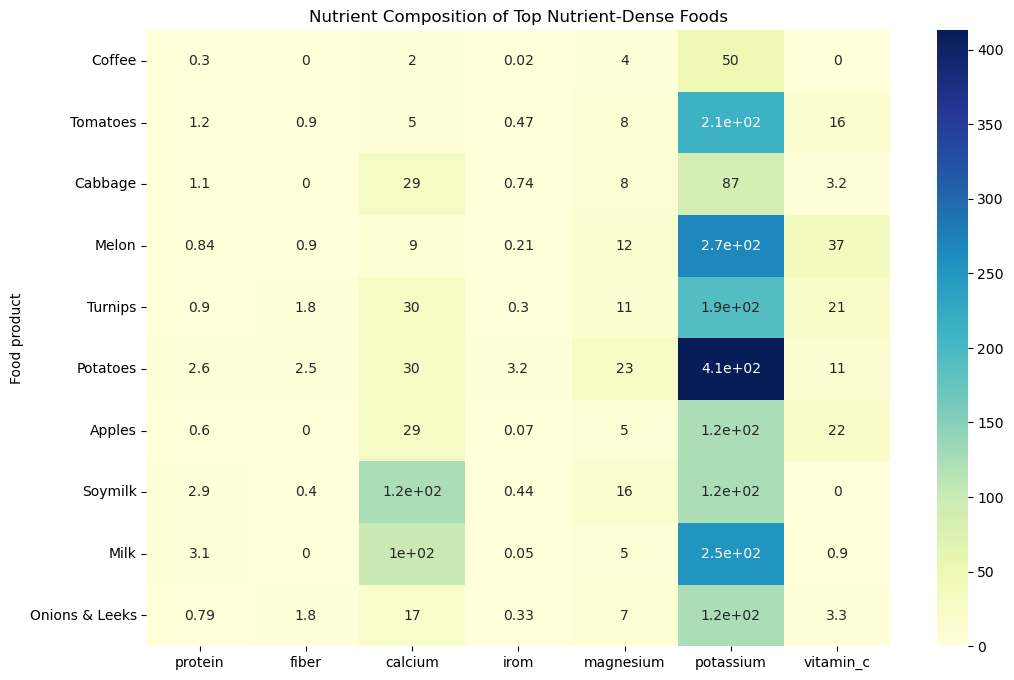

In [12]:
# Select nutrients data for top foods
top_foods_nutrients = top_foods[['Food product'] + nutrients].set_index('Food product')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(top_foods_nutrients, annot=True, cmap="YlGnBu")
plt.title('Nutrient Composition of Top Nutrient-Dense Foods')
plt.show()


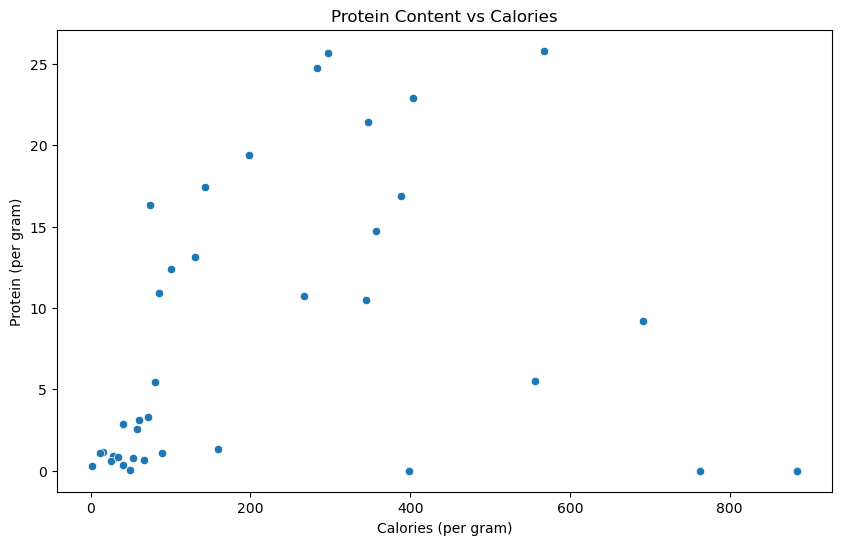

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='protein', data=data)
plt.title('Protein Content vs Calories')
plt.xlabel('Calories (per gram)')
plt.ylabel('Protein (per gram)')
plt.show()


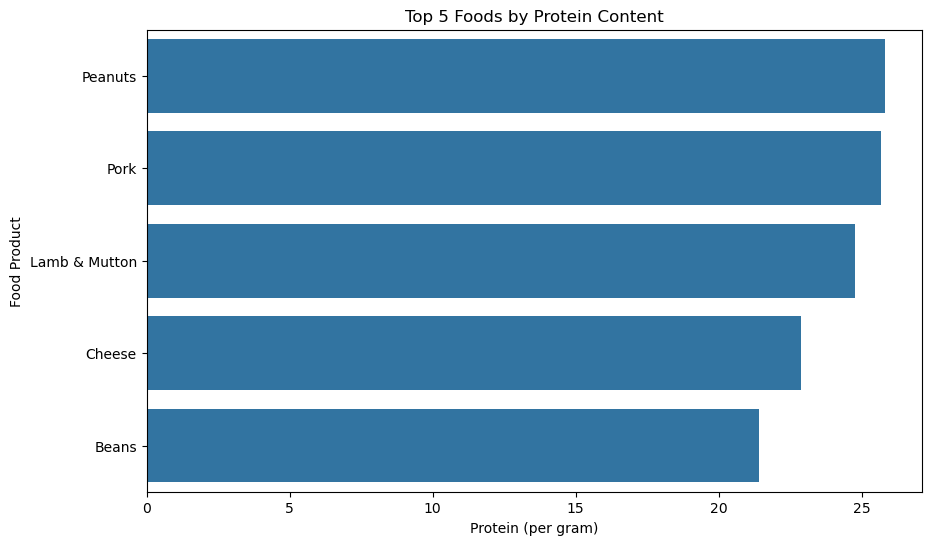

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data = pd.read_csv("processed_no_units.csv")

# Sort the data by protein content and select the top five
top_protein_foods = data.sort_values(by='protein', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='protein', y='Food product', data=top_protein_foods)
plt.title('Top 5 Foods by Protein Content')
plt.xlabel('Protein (per gram)')
plt.ylabel('Food Product')
plt.show()


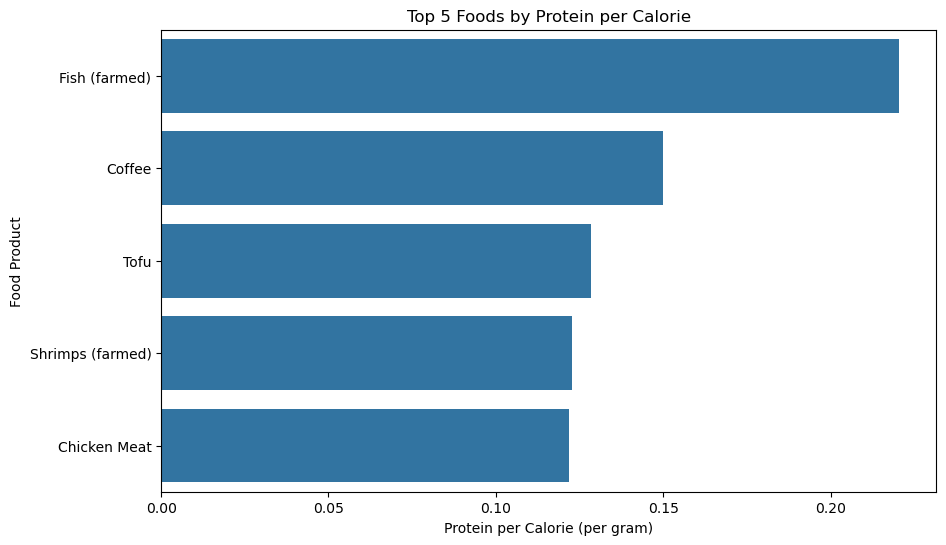

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data = pd.read_csv("processed_no_units.csv")

# Calculate protein per calorie ratio
data['protein_per_calorie'] = data['protein'] / data['calories']

# Sort the data by protein per calorie ratio and select the top five
top_protein_per_calorie_foods = data.sort_values(by='protein_per_calorie', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='protein_per_calorie', y='Food product', data=top_protein_per_calorie_foods)
plt.title('Top 5 Foods by Protein per Calorie')
plt.xlabel('Protein per Calorie (per gram)')
plt.ylabel('Food Product')
plt.show()


## Integrate cost

In [18]:
df = pd.read_csv('processed_no_units_gram.csv')
cost_df = pd.read_csv('prices.csv')


In [21]:
cost_df = cost_df.iloc[:,:-1]

In [22]:
cost_df.head()

,Food product,Range 1,Range 2,Avg price (USD/kg)
0,Wheat & Rye (Bread),0.97,1.93,1.45
1,Maize (Meal),0.29,0.98,0.64
2,Barley (Beer),0.99,1.97,1.48
3,Oats,0.98,2.95,1.97
4,Rice,0.71,1.97,1.34


In [29]:
prices = cost_df["Avg price (USD/kg)"]
prices_g = prices / 1000

In [33]:
final_df = df
final_df['price'] = prices_g
final_df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Matched_food_product,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,...,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,price
0,Wheat & Rye (Bread),0.0001,0.0,0.0008,0.0002,0.0001,0.0001,0.0001,0.0014,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,"Bread, wheat",0.0,100,2.67,0.032,0.008,0.0,5.08,0.187,0.85,0.2,0.05620,0.00000,0.00253,0.00415,0.02,0.00,0.0,0.01,0.0,0.44,0.0,0.0,0.00111,0.002,0.0,0.0019,...,0.049,1.33,0.00159,0.0349,0.45,0.01177,1.49,1.77,0.288,0.0119,0.1072,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.4868,0.040,0.0591,0.0245,0.0,0.0178,0.0,0.0168,0.0000,0.0324,0.00777,0.00607,0.01499,0.0,0.000,0.0216,0.0,0.0,0.3520,0.00145
1,Maize (Meal),0.0003,0.0,0.0005,0.0001,0.0001,0.0001,0.0000,0.0011,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,Barley flour or meal,0.0,100,3.45,0.016,0.003,0.0,0.04,0.378,0.08,0.0,0.06269,0.00145,0.00114,0.00370,0.00,0.00,0.0,0.00,0.0,1.60,0.0,0.0,0.00396,0.000,0.0,0.0057,...,0.022,0.32,0.00343,0.0268,0.96,0.01034,2.96,3.09,0.377,0.0200,0.1050,0.00409,0.00526,0.00655,0.00232,0.02741,0.00380,0.00236,0.0,0.00383,0.00713,0.00391,0.00202,0.00589,0.01247,0.00443,0.00356,0.00175,0.00301,0.00515,0.7452,0.101,0.0080,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0160,0.00335,0.00205,0.00771,0.0,0.000,0.0128,0.0,0.0,0.1211,0.00064
2,Barley (Beer),0.0000,0.0,0.0002,0.0001,0.0000,0.0005,0.0003,0.0011,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,"Alcoholic beverage, BUDWEISER, regular, beer",0.0,100,0.41,0.000,0.000,0.0,0.00,0.000,0.00,0.0,0.00000,0.00000,0.00000,0.00000,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00000,0.000,0.0,0.0000,...,0.000,0.00,0.00000,0.0000,0.00,0.00000,0.00,0.00,0.000,0.0000,0.0036,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0297,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0,0.039,0.0011,0.0,0.0,0.9277,0.00148
3,Oats,0.0000,0.0,0.0014,0.0000,0.0001,0.0001,0.0000,0.0016,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,

In [37]:
final_df.columns[49:]

Index(['vitamin_e', 'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper',
       'irom', 'magnesium', 'manganese', 'phosphorous', 'potassium',
       'selenium', 'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid',
       'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline',
       'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine',
       'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 'valine',
       'carbohydrate', 'fiber', 'sugars', 'fructose', 'galactose', 'glucose',
       'lactose', 'maltose', 'sucrose', 'fat', 'saturated_fatty_acids',
       'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids',
       'fatty_acids_total_trans', 'alcohol', 'ash', 'caffeine', 'theobromine',
       'water', 'price'],
      dtype='object')

In [38]:
final_df_2 = final_df[['Food product', 'Total_emissions', 'price',
       'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha', 
       'vitamin_k', 'calcium', 'copper',
       'irom', 'magnesium', 'manganese', 'phosphorous', 'potassium',
       'selenium', 'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid',
       'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline',
       'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine',
       'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 'valine',
       'carbohydrate', 'fiber', 'sugars', 'fructose', 'galactose', 'glucose',
       'lactose', 'maltose', 'sucrose', 'fat', 'saturated_fatty_acids',
       'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids',
       'fatty_acids_total_trans', 'alcohol', 'ash', 'caffeine', 'theobromine',
       'water']]

In [41]:
final_df_2 = final_df_2.rename(columns={'Food product': 'food',
                           'Total_emissions': 'emissions'})

In [42]:
final_df_2.to_csv('final_df.csv', index=False)